## What are the most demanded skills for the Top 3 most popular data roles?

In [1]:
import pandas as pd
import numpy as np
import ast
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df_clean = df.drop_duplicates().copy()
df_clean = df_clean.drop_duplicates(subset=['job_title','company_name','job_country'])
df_clean['job_skills'] = df_clean['job_skills'].apply(lambda skills:ast.literal_eval(skills)if pd.notna(skills)else skills)

In [41]:
df_US = df_clean[df_clean['job_country']=='United States']
df_skills = df_US.explode('job_skills')

In [42]:
df_skills[['job_title_short','job_skills']]

,job_title_short,job_skills
0,Senior Data Engineer,None
3,Data Engineer,python
3,Data Engineer,c++
3,Data Engineer,java
3,Data Engineer,matlab
...,...,...
785626,Data Analyst,microsoft teams
785641,Data Engineer,None
785651,Data Scientist,go
785673,Data Scientist,None


In [89]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name='skill_count')

df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False)

df_skills_count

,job_skills,job_title_short,skill_count
1199,python,Data Scientist,22972
1510,sql,Data Analyst,21149
451,excel,Data Analyst,17440
1512,sql,Data Scientist,16528
1511,sql,Data Engineer,15170
...,...,...,...
75,asana,Software Engineer,1
242,clojure,Software Engineer,1
521,flutter,Senior Data Engineer,1
1499,spss,Cloud Engineer,1


In [100]:
Top_3 = sorted(df_skills.value_counts('job_title_short').head(3).index.to_list())
Top_3

['Data Analyst', 'Data Engineer', 'Data Scientist']

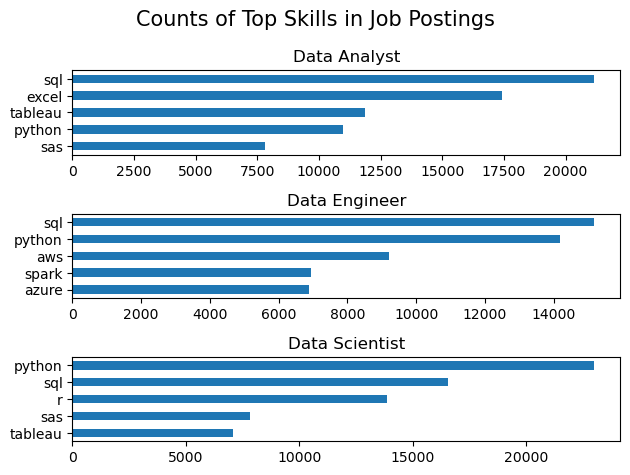

In [101]:
fig, ax = plt.subplots(len(Top_3),1)
for i, title in enumerate(Top_3):
    skills = df_skills_count[df_skills_count['job_title_short']==title].head(5)
    skills.plot(kind='barh', ax=ax[i], x='job_skills', y='skill_count', title=title)
    ax[i].legend().set_visible(False)
    ax[i].invert_yaxis()
    ax[i].set_ylabel("")

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout()

In [102]:
df_skills_total = df_US.value_counts('job_title_short').reset_index(name='total_count')
df_skills_total

,job_title_short,total_count
0,Data Analyst,42647
1,Data Scientist,33344
2,Data Engineer,22507
3,Senior Data Analyst,7419
4,Senior Data Scientist,7232
5,Business Analyst,6360
6,Senior Data Engineer,5579
7,Software Engineer,1570
8,Machine Learning Engineer,786
9,Cloud Engineer,385


In [103]:
df_skills_percent = pd.merge(df_skills_count, df_skills_total, on='job_title_short', how='left')

df_skills_percent['percent']=df_skills_percent['skill_count']/df_skills_percent['total_count'] * 100

df_skills_percent

,job_skills,job_title_short,skill_count,total_count,percent
0,python,Data Scientist,22972,33344,68.893954
1,sql,Data Analyst,21149,42647,49.590827
2,excel,Data Analyst,17440,42647,40.893850
3,sql,Data Scientist,16528,33344,49.568138
4,sql,Data Engineer,15170,22507,67.401253
...,...,...,...,...,...
1852,asana,Software Engineer,1,1570,0.063694
1853,clojure,Software Engineer,1,1570,0.063694
1854,flutter,Senior Data Engineer,1,5579,0.017924
1855,spss,Cloud Engineer,1,385,0.259740


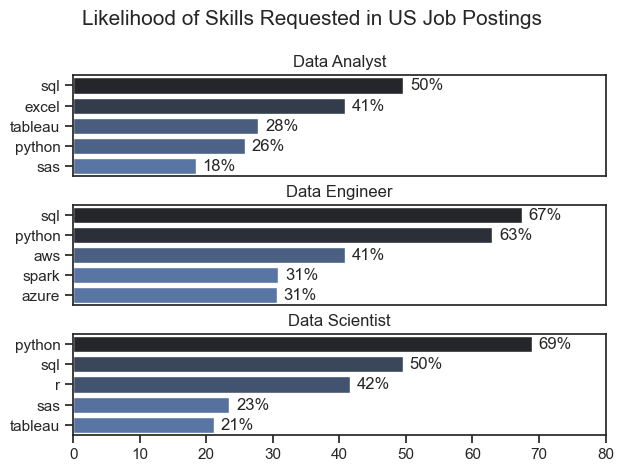

In [151]:
fig, ax = plt.subplots(len(Top_3),1)
sns.set_theme(style='ticks')

for i, title in enumerate(Top_3):
    skills = df_skills_percent[df_skills_percent['job_title_short']==title].head(5)
    # skills.plot(kind='barh', ax=ax[i], x='job_skills', y='percent', title=title)
    sns.barplot(data=skills, ax=ax[i], x='percent', y='job_skills', hue='percent', palette='dark:b_r')
    ax[i].legend().set_visible(False)
    ax[i].set_title(title)
    ax[i].set_xlim(0, 80)
    # ax[i].invert_yaxis()
    ax[i].set_ylabel("")
    ax[i].set_xlabel("")
    if i != len(Top_3)-1:
        ax[i].set_xticks([])

    for n,v in enumerate(skills['percent']):
        ax[i].text(v+1,n,f'{v:.0f}%',va='center')

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5)